In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
data = pd.read_csv("C:/Users/ManiShankar/Documents/LetsUpgrade/AI_ML/Materials/Datasets/Titanic train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,45.0,1,2,W./C. 6607,23.45,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
888,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
len(data)

889

In [8]:
# Since most of the entries of Cabin are Nan we drop that column
# Name,PassengerId,Ticket doesn't have any significance so drop them

In [9]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [10]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
# We convert categorical variable to numerical
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [13]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [14]:
data['Age'] = data['Age'].astype(np.int64)
data['Sex'] = data['Sex'].astype(np.int64)
data['Embarked'] = data['Embarked'].astype(np.int64)

In [15]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [16]:
# DV and IDV

y = pd.DataFrame({'Pclass':data.Pclass})
x = data.drop('Pclass',axis=1)

In [17]:
y.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [18]:
x.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,1,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,0,1,35,0,0,8.0500,2


# KNN

In [19]:
# Split data for trainig and testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [20]:
print(len(x_train))
x_train.head(1)

622


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
350,0,1,45,0,0,35.0,2


In [21]:
print(len(x_test))
x_test.head(1)

267


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
14,0,0,14,0,0,7.8542,2


In [22]:
print(len(y_train))
y_train.head(1)

622


,Pclass
350,1


In [23]:
print(len(y_test))

267


In [24]:
y.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [25]:
# Let us define range of k as 1,sqrt(len(x_train))

In [26]:
range_k = int(np.ceil(np.sqrt(len(x_train))))
range_k

25

In [27]:
accuracy = []
k = [i for i in range(1, range_k + 1)]

In [28]:
def KNN(i):
    knn = KNeighborsClassifier(n_neighbors = i)
    clf = knn.fit(x_train, y_train)
    accuracy.append(clf.score(x_test,y_test))

In [29]:
for i in k:
    KNN(i)

C:\Users\ManiShankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ManiShankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ManiShankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ManiShankar\Anaconda3\lib\site-packages\ipykernel_launc

In [30]:
plot = pd.DataFrame({'k':np.array(k), 'Accuracy':np.array(accuracy)})

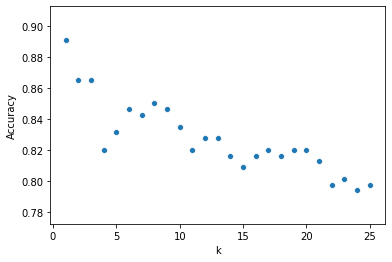

In [31]:
sns.scatterplot(plot.k,plot.Accuracy)

In [32]:
max(accuracy)

0.8913857677902621

In [34]:
k[accuracy.index(0.8913857677902621)]

1

In [35]:
# Maximum is when k=1

# SVM

In [36]:
models = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [37]:
def SVM(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    clf = svm.SVC(gamma = 0.01)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy_score:",accuracy_score(y_test, y_pred))
    print("Confusion-matrix:")
    print(confusion_matrix(y_test, y_pred))

In [38]:
for col in models :
    y = data[col]
    x = data.drop(col,axis=1)
    print("")
    print(col,"Vs Remaining Dv")
    SVM(x,y)


Pclass Vs Remaining Dv
Accuracy_score: 0.8314606741573034
Confusion-matrix:
[[ 61   8   1]
 [  6  28  15]
 [  3  12 133]]

Survived Vs Remaining Dv
Accuracy_score: 0.6779026217228464
Confusion-matrix:
[[137  20]
 [ 66  44]]

Sex Vs Remaining Dv
Accuracy_score: 0.651685393258427
Confusion-matrix:
[[ 30  68]
 [ 25 144]]

SibSp Vs Remaining Dv
Accuracy_score: 0.704119850187266
Confusion-matrix:
[[153  27   0   0   2   0   0]
 [ 33  30   0   0   2   0   0]
 [  6   2   0   0   0   0   0]
 [  1   3   0   0   3   0   0]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]]

Parch Vs Remaining Dv
Accuracy_score: 0.797752808988764
Confusion-matrix:
[[196   0   2   0   0]
 [ 30   6   4   0   0]
 [ 14   2  11   0   0]
 [  0   0   1   0   0]
 [  1   0   0   0   0]]

Embarked Vs Remaining Dv
Accuracy_score: 0.7265917602996255
Confusion-matrix:
[[ 10   0  39]
 [  0   0  22]
 [ 12   0 184]]
